# EDA 


In [1]:
# !pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression

In [2]:
def sanitize_text_reviews(df):
    df['clean_text_reviews'] = df['reviewText'].str.lower().str.replace(r"[^[a-zA-Z0-9_\t\n\r\s]", r" ", regex=True)
    return df

def sanitize_text_summary(df):
    df['clean_text_summary'] = df['summary'].str.lower().str.replace(r"[^[a-zA-Z0-9_\t\n\r\s]", r" ", regex=True)
    return df

def to_tidy_format_reviews(df):
    tidy_df_reviews = (
        df["clean_text_reviews"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text_reviews": "word"})
    )
    return tidy_df_reviews

def to_tidy_format_summary(df):
    tidy_df_summary = (
        df["clean_text_summary"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text_summary": "word"})
    )
    return tidy_df_summary

def add_polarity_reviews(df, tidy_df_reviews):
    df["polarity_reviews"] = (
        tidy_df_reviews
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['index', 'polarity']]
        .fillna(0)
        .groupby('index')
        .sum()
    )
    return df

def add_polarity_summary(df, tidy_df_summary):
    df["polarity_summary"] = (
        tidy_df_summary
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['index', 'polarity']]
        .fillna(0)
        .groupby('index')
        .sum()
    )
    return df

print(''.join(open("../data/vader_lexicon.txt").readlines()[:10]))
sent = pd.read_csv("../data/vader_lexicon.txt", sep='\t', header = None).loc[:, [0,1]].rename(columns={0: "token", 1: "polarity"}).set_index('token')
sent.head()

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [3]:
df = pd.read_json("../data/Original/Patio_Lawn_and_Garden_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day', 'asin' , 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Lawn_112723.json")

In [4]:
df = pd.read_json("../data/Original/Sports_and_Outdoors_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day', 'asin', 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Sports_112723.json")

In [5]:
df = pd.read_json("../data/Original/Tools_and_Home_Improvement_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day','asin', 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Tools_112723.json")

In [6]:
df = pd.read_json("../data/Original/Toys_and_Games_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day','asin', 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Toys_112723.json")

In [7]:
df = pd.read_json("../data/Original/Video_Games_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day','asin',  'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/VideoGames_112723.json")

In [8]:
df = pd.read_json("../data/Original/Movies_and_TV_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day', 'asin', 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Movies_112723.json")

In [9]:
df = pd.read_json("../data/Original/Kindle_Store_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day', 'asin', 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Kindle_112723.json")

In [10]:
# outdoor categories 
lawn= pd.read_json("../data/112723/Lawn_112723.json", lines=False, encoding="latin-1")

#sports = pd.read_json("Sports_112723.json", lines=False, encoding="latin-1")

tools = pd.read_json("../data/112723/Tools_112723.json", lines=False, encoding="latin-1")

In [11]:
# indoor categories
toys= pd.read_json("../data/112723/Toys_112723.json", lines=False, encoding="latin-1")

video_games = pd.read_json("../data/112723/VideoGames_112723.json", lines=False, encoding="latin-1")

# #movies = pd.read_json("Movies_112723.json", lines=False, encoding="latin-1")

# #kindle = pd.read_json("Kindle_112723.json", lines=False, encoding="latin-1")

In [12]:
out = pd.concat([lawn,  tools])

ind = pd.concat([toys,video_games])

data = pd.concat([out, ind])

In [13]:
data['length of review'] = data['reviewText'].replace('None', '').fillna('').str.split().apply(len)

In [14]:
data['vote'] = data['vote'].fillna('0').str.replace(',', '')

# Convert the 'vote' column to integers
data['vote'] =data['vote'].astype(int)

data['verified'] = data['verified'].astype(int)

In [15]:
data.head()

,year,month,day,asin,overall,verified,reviewerID,reviewerName,reviewText,summary,vote,polarity_reviews,polarity_summary,length of review
0,2011,12,11,9539723809,5,1,AUVPE2KEXBJVT,T. E. Kainz,I don't spend a lot on my flags because they r...,Good quality for the price,2,5.1,1.9,111
1,2011,7,30,9539723809,5,1,A2F6GES1MBOFXS,BluesJamJim,"Super fast processing and shipping, if you are...",3'x5' Colorado State flag,0,6.7,0.0,25
2,2016,5,4,9539723809,5,1,A1SDVD3SZI1BAK,Gabriel M Martinez,Great product. I would recommend this product...,Colorado Flag,0,6.1,0.0,12
3,2015,11,2,9539723809,5,1,A1ZQJ3KCSLUPR3,RAJ THE FLASH,GREAT PRICE I LOVE MY STATE AND COUNTRY,RETIRED MILITARY,0,6.3,0.0,8
4,2015,9,1,9539723809,5,1,ANU8FBZM618M3,James R. Mills,Great display flag for the den.,Five Stars,0,3.1,0.0,6


# What is the distribution of the overall scores in the dataframes? 

<font size = 4> We start a first part of our EDA with the analysis of the distribution of values for the feature "overall", and we see that a large portion of the dataset's reviews have maximum score for all product categories.  <font>

Text(0.5, 1.0, "Distribution of 'Overall' feature in Dataset")

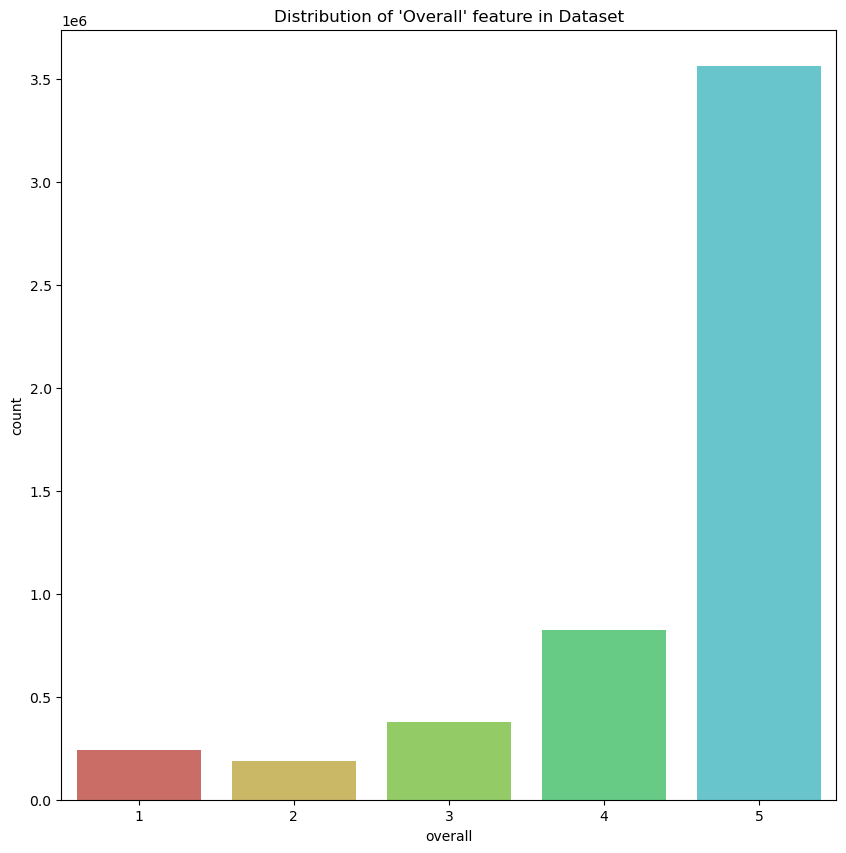

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(data=data, x = "overall", palette=sns.color_palette("hls", 8))
plt.title("Distribution of 'Overall' feature in Dataset")

# Visualizations for Polarity by Year 

Text(0.5, 1.0, 'polarity score of reviews by year')

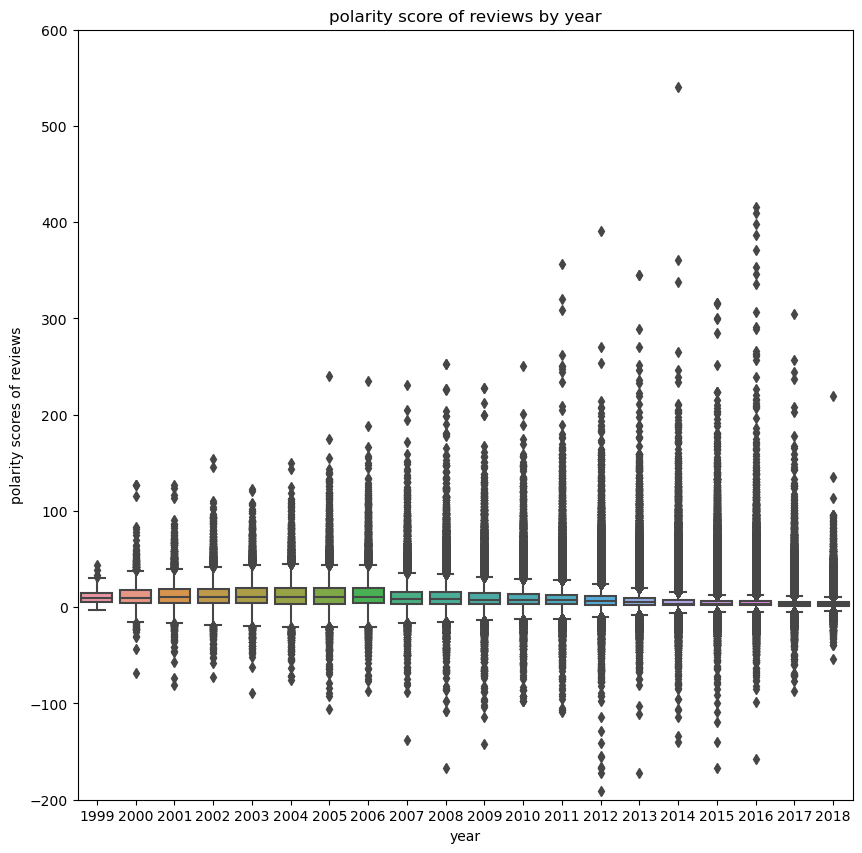

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x="year",y="polarity_reviews", data=data)
plt.ylim(-200,600)
plt.ylabel("polarity scores of reviews")
plt.title("polarity score of reviews by year")

# Visualizations for Polarity by Month 

Text(0.5, 1.0, 'polarity score of reviews by month')

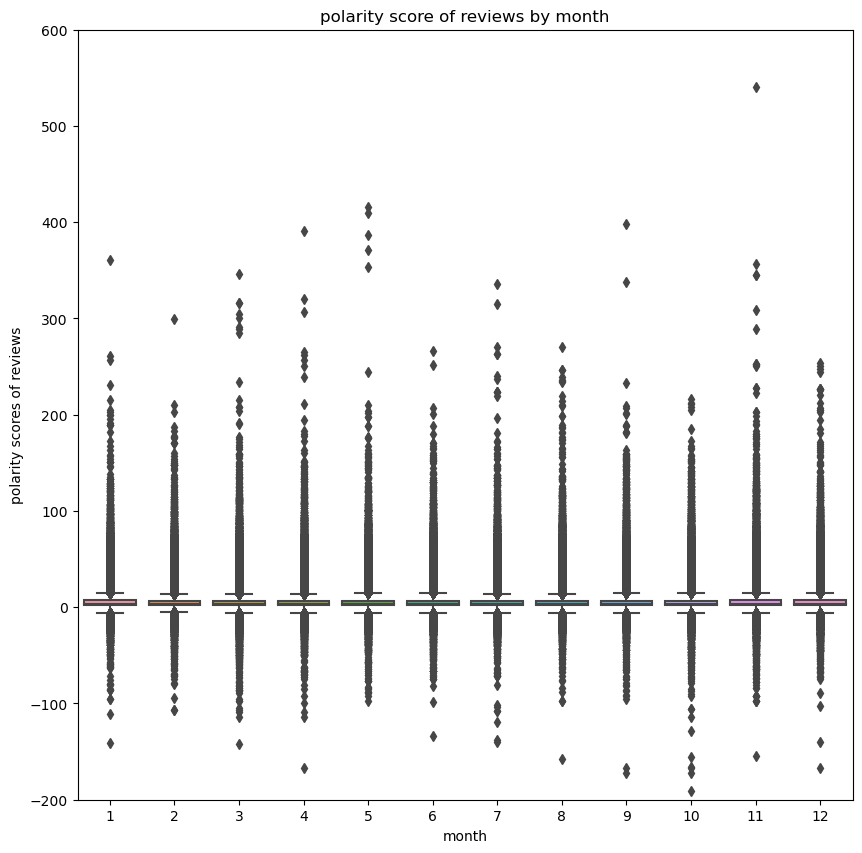

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(x="month",y="polarity_reviews", data=data)
plt.ylim(-200,600)
plt.ylabel("polarity scores of reviews")
plt.title("polarity score of reviews by month")

# Visualizations for Polarity by Verified Status

Text(0.5, 1.0, 'polarity score of reviews by verified status')

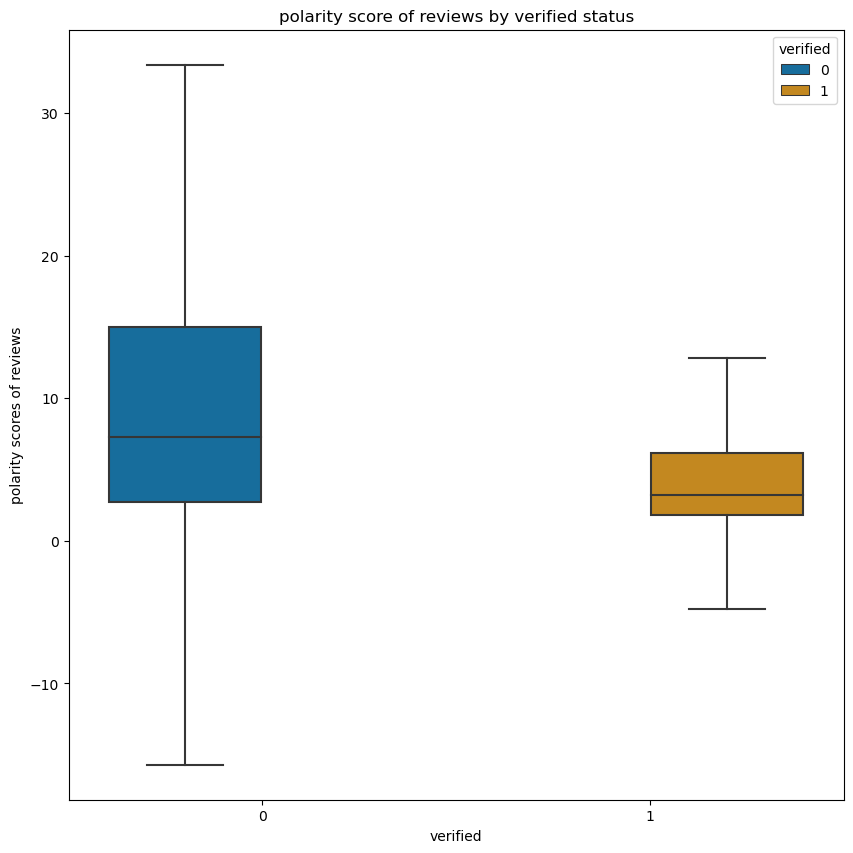

In [19]:
plt.figure(figsize=(10,10))
sns.boxplot(x="verified",y="polarity_reviews", data=data,showfliers=False, palette="colorblind", hue="verified")
plt.ylabel("polarity scores of reviews")
plt.title("polarity score of reviews by verified status")
#plt.ylim(-300,600)

# Visualizations for Polarity by Length of review
- histogram to see spread 
- bar plot average polarity score of "length of review" ranges
- boxplot of polarity scores by "length of review" ranges 

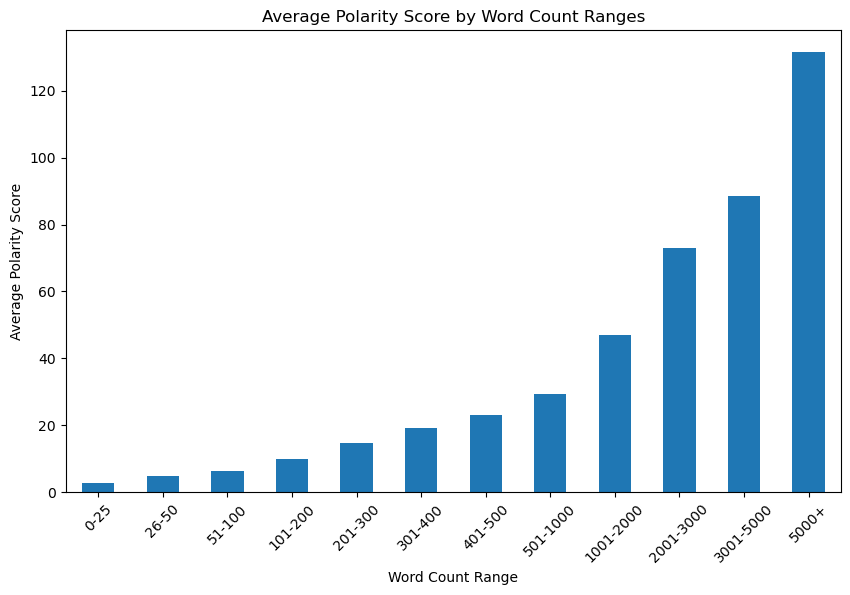

In [21]:
# Define word count ranges
bins = [0, 25, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 5000, float('inf')]
labels = ['0-25', '26-50', '51-100', '101-200', '201-300', '301-400', '401-500', '501-1000', '1001-2000', '2001-3000', '3001-5000', '5000+']
data['length range'] = pd.cut(data['length of review'], bins=bins, labels=labels, right=False)

# Group by word count range and calculate average polarity
grouped = data.groupby('length range')['polarity_reviews'].mean()

plt.figure(figsize=(10,6))
grouped.plot(kind='bar')
plt.title('Average Polarity Score by Word Count Ranges')
plt.xlabel('Word Count Range')
plt.ylabel('Average Polarity Score')
plt.xticks(rotation=45)
plt.show()

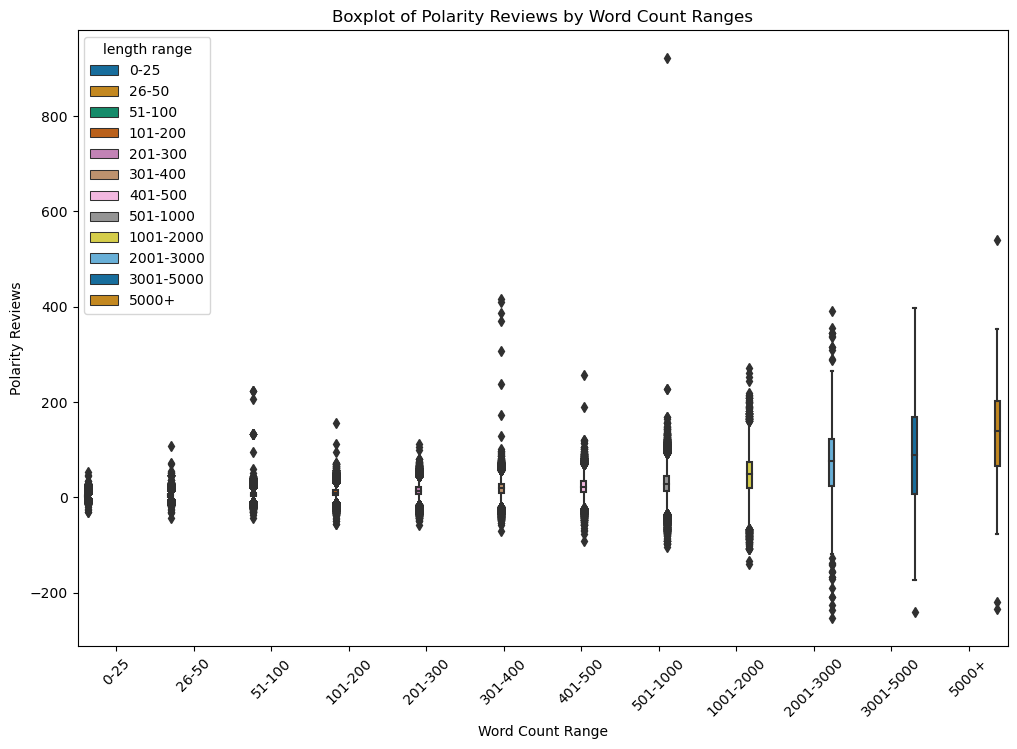

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='length range', y='polarity_reviews', data=data, palette="colorblind", hue="length range")
plt.title('Boxplot of Polarity Reviews by Word Count Ranges')
plt.xlabel('Word Count Range')
plt.ylabel('Polarity Reviews')
plt.xticks(rotation=45)
plt.show()


#  Visualizations for Polarity by Overall Rating 

Text(0.5, 1.0, 'polarity score of reviews by overall rating')

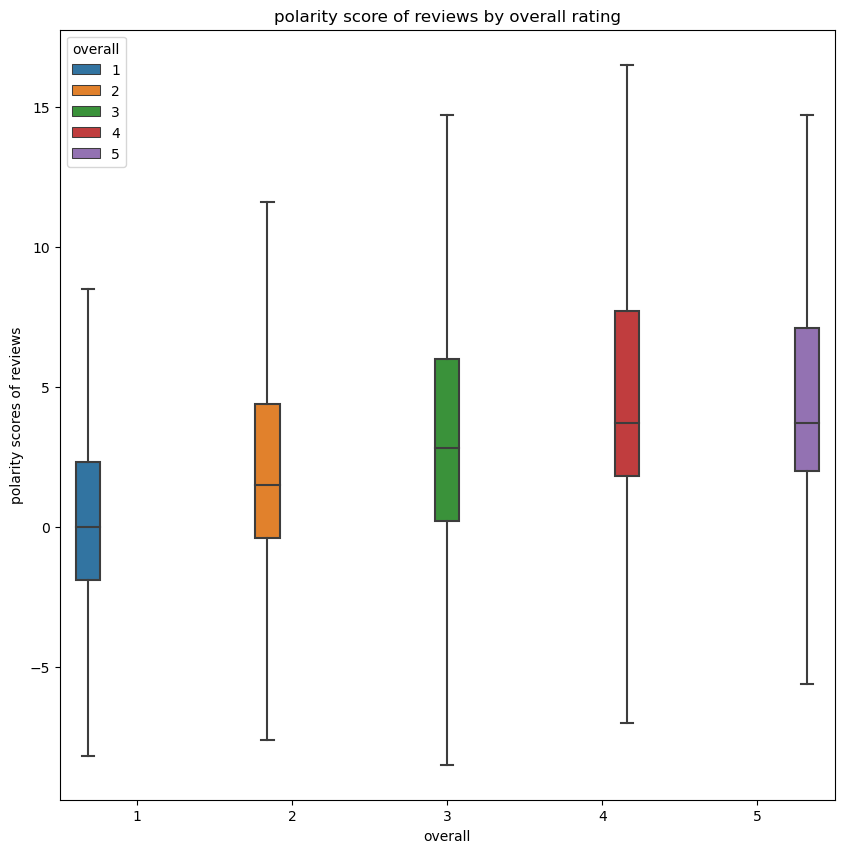

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(x="overall",y="polarity_reviews", data=data,showfliers=False, hue='overall')
#plt.ylim(-200,600)
plt.ylabel("polarity scores of reviews")
plt.title("polarity score of reviews by overall rating")

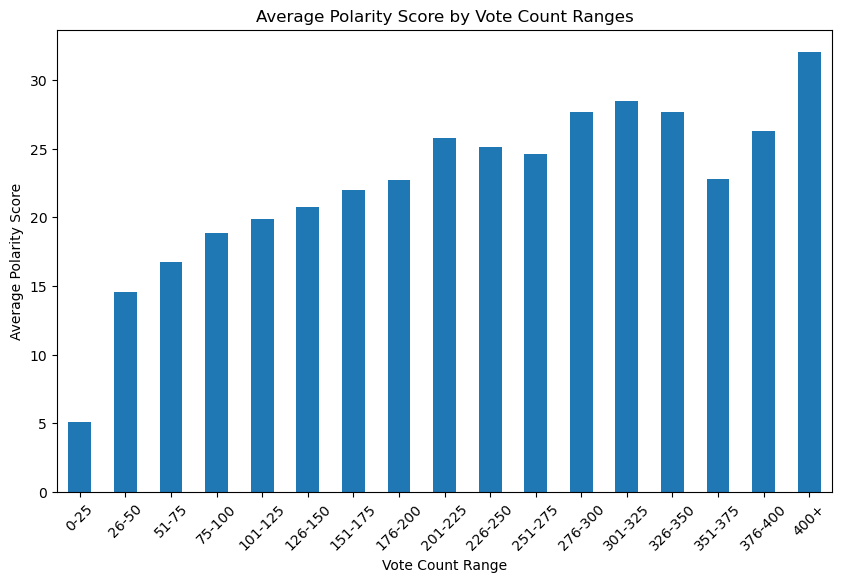

In [28]:
data['vote'].describe()

bins = [0, 25,50,75,100, 125, 150, 175,200, 225, 250, 275, 300, 325, 350, 375, 400,float('inf')]
labels = ['0-25','26-50','51-75', '75-100', '101-125', '126-150', '151-175', '176-200', '201-225', '226-250','251-275','276-300', '301-325','326-350', '351-375', '376-400', '400+']
data['vote range'] = pd.cut(data['vote'], bins=bins, labels=labels, right=False)

# Group by word count range and calculate average polarity
grouped = data.groupby('vote range')['polarity_reviews'].mean()

plt.figure(figsize=(10,6))
grouped.plot(kind='bar')
plt.title('Average Polarity Score by Vote Count Ranges')
plt.xlabel('Vote Count Range')
plt.ylabel('Average Polarity Score')
plt.xticks(rotation=45)
plt.show()

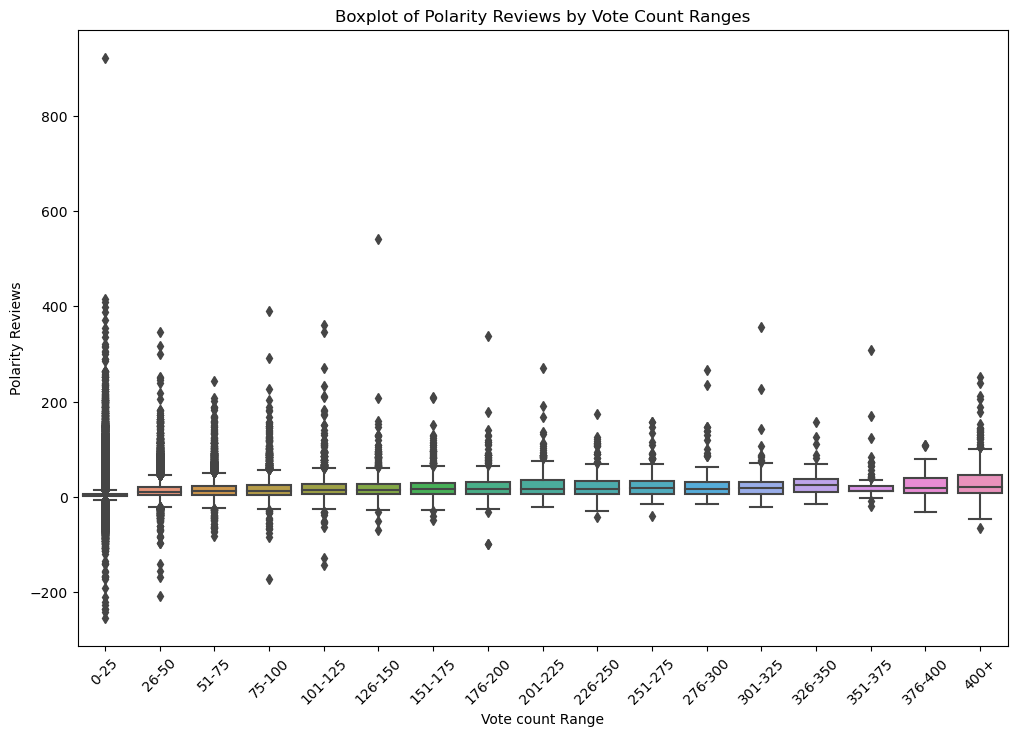

In [29]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='vote range', y='polarity_reviews', data=data)
plt.title('Boxplot of Polarity Reviews by Vote Count Ranges')
plt.xlabel('Vote count Range')
plt.ylabel('Polarity Reviews')
plt.xticks(rotation=45)
plt.show()

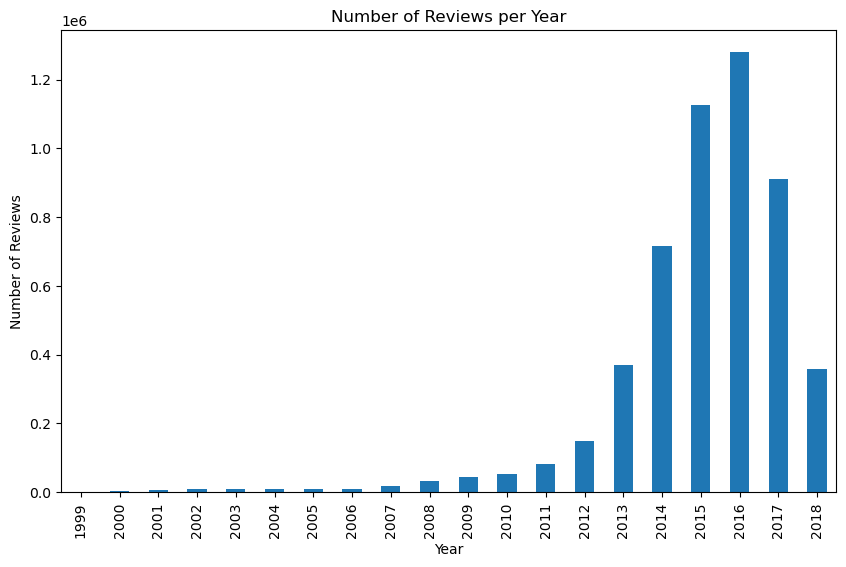

In [30]:
reviews_per_year = data.groupby('year').size()

plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='bar')  
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()